In [10]:
pip --version

pip 23.2.1 from C:\Users\shrey\anaconda3\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


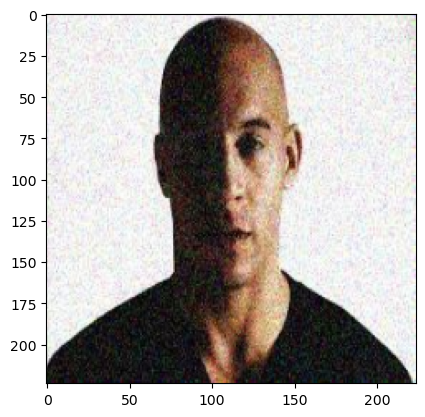

1376


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 

                                                                 
 conv_pw_7_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_7_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
          

                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0         
                                                                 
 conv_pw_1 (Conv2D)          (None, 112, 112, 64)      2048      
                                                                 
 conv_pw_1_bn (BatchNormali  (None, 112, 112, 64)      256       
 zation)                                                         
                                                                 
 conv_pw_1_relu (ReLU)       (None, 112, 112, 64)      0         
          

 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_9_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_9

1/1 [==============================] - 0s 25ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 25ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 27ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 27ms/step
face not detected
1/1 [==============================] - 0s 27ms/step
face not detected
1/1 [==============================] - 0s 26ms/step
face not detected
1/1 [==============================] - 0s 27ms/step


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


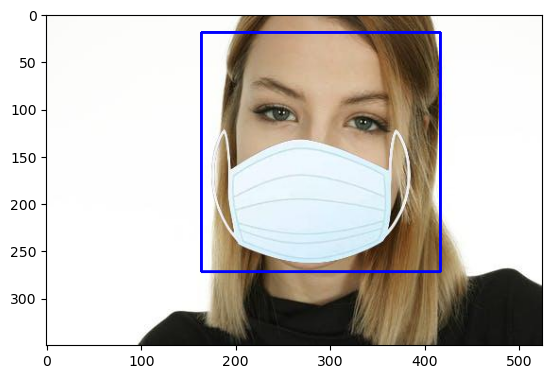

In [1]:
#importing required lib
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as mtp
import numpy as np

# reading an image
img_array=cv2.imread("C:/Users/shrey/Desktop/ML/Dataset/with mask/0-with-mask.jpg")
mtp.imshow(img_array)#its shows image in bgr blue-green-red

mtp.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)) #converting the image to normal form

img_array.shape

datadirectory="C:/Users/shrey/Desktop/ML/Dataset" #giving a variale name for the directory
classes=["with mask","without mask"] # the classes that are avaliable
classes
for category in classes:
    path=os.path.join(datadirectory,category)   #combining
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        mtp.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        mtp.plot()  #plotting


img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
mtp.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
mtp.show()   # resizing the image

training_data=[] #create a list of the dataset
def create_training_data():
    for category in classes:
        path=os.path.join(datadirectory,category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data() #calling the method

print(len(training_data)) #checking if all images taken or not


import random #shuffling to reduce overfitting
random.shuffle(training_data)




  #converting from normal array to np array 
#NumPy Arrays provides the ndim attribute that returns an integer that tells us how many dimensions the array have. 
x=[] 
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,3)

x.shape  #checking size

#normalizing the data
x=x/255.0

y=np.array(x)
import pickle #convert to byte_stream
#doing it for x
pickle_out=open("x.pickle","wb") #open a file in wb-write binary
pickle.dump(x,pickle_out)
pickle_out.close()

#doing the same for y
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()
#preprocessing done

pickle_in=open("x.pickle","rb")
x=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

#same step as previous just doing the opposite thats it
#end of datapreprocessing

#training model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model=tf.keras.applications.mobilenet.MobileNet()

model.summary()

base_input=model.layers[0].input

base_output=model.layers[-4].output

flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

new_model=keras.Model(inputs=base_input,outputs=final_output)

new_model.summary()

new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

frame=cv2.imread("C:/Users/shrey/Desktop/ML/Dataset/with mask/1-with-mask.jpg")

mtp.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")


gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
gray.shape

faces=faceCascade.detectMultiScale (gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess=faceCascade.detectMultiScale (roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

mtp.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

import cv2
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN
rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="Some text in a box"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)


cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")


while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi=roi_color[ey: ey+eh, ex:ex + ew]
                
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims (final_image, axis =0)
## need fourth dimension
    final_image=final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN    

    if (Predictions>0):
        status="face"
        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1)
    # Add text
        cv2.putText(frame,status,(x1+ int(w1/10),y1+ int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    else:
        status="Face Mask"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))  
        
        
    cv2.imshow("video_cam",frame)        
        
    if cv2.waitKey(2)&0xFF==ord('q') :
        break
        
        
        
        
cap.release()
cv2.destroyAllWindows()

In [11]:
pip install keras.utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2658 sha256=8360ba6c3a1eef71091987a68187d385006d682ab41ef800a2f0298f76496b6f
  Stored in directory: c:\users\shrey\appdata\local\pip\cache\wheels\84\04\c8\f3d21e09aa3a1e25bc4a4fc07341ca073d7372f33dbd344a06
Successfully built keras.utils
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install keras.models

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install np_utils

     ---------------------------------------- 0.0/62.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/62.0 kB ? eta -:--:--
     -------------------------- ------------- 41.0/62.0 kB ? eta -:--:--
     -------------------------------------- 62.0/62.0 kB 663.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56454 sha256=289a474040f71f5d2d3c30da654508dfdf04949d01c516b426c1cd062bbb96ae
  Stored in directory: c:\users\shrey\appdata\local\pip\cache\wheels\19\0d\33\eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2,os

data_path='C:/Users/shrey/Desktop/ML/Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [3]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

import keras

new_target=keras.utils.to_categorical(target)

In [4]:
np.save('data',data)
np.save('target',new_target)

In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20


31/31 [==============================] - ETA: 0s - loss: 0.7278 - accuracy: 0.5434INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 47s 1s/step - loss: 0.7278 - accuracy: 0.5434 - val_loss: 0.6492 - val_accuracy: 0.6008
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.6778INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 45s 1s/step - loss: 0.5762 - accuracy: 0.6778 - val_loss: 0.4937 - val_accuracy: 0.7984
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.8242INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 46s 1s/step - loss: 0.3887 - accuracy: 0.8242 - val_loss: 0.3200 - val_accuracy: 0.8629
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9192INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


31/31 [==============================] - 42s 1s/step - loss: 0.2244 - accuracy: 0.9192 - val_loss: 0.3140 - val_accuracy: 0.8710
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1788 - accuracy: 0.9333INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 45s 1s/step - loss: 0.1788 - accuracy: 0.9333 - val_loss: 0.2494 - val_accuracy: 0.8710
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1570 - accuracy: 0.9424INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 42s 1s/step - loss: 0.1570 - accuracy: 0.9424 - val_loss: 0.2477 - val_accuracy: 0.8952
Epoch 7/20
31/31 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9576INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


31/31 [==============================] - 43s 1s/step - loss: 0.1113 - accuracy: 0.9576 - val_loss: 0.1591 - val_accuracy: 0.9355
Epoch 8/20
31/31 [==============================] - 40s 1s/step - loss: 0.0781 - accuracy: 0.9758 - val_loss: 0.2208 - val_accuracy: 0.9234
Epoch 9/20
31/31 [==============================] - ETA: 0s - loss: 0.0755 - accuracy: 0.9788INFO:tensorflow:Assets written to: model-009.model\assets


INFO:tensorflow:Assets written to: model-009.model\assets


31/31 [==============================] - 44s 1s/step - loss: 0.0755 - accuracy: 0.9788 - val_loss: 0.1265 - val_accuracy: 0.9597
Epoch 10/20
31/31 [==============================] - ETA: 0s - loss: 0.0635 - accuracy: 0.9737INFO:tensorflow:Assets written to: model-010.model\assets


INFO:tensorflow:Assets written to: model-010.model\assets


31/31 [==============================] - 43s 1s/step - loss: 0.0635 - accuracy: 0.9737 - val_loss: 0.1134 - val_accuracy: 0.9556
Epoch 11/20
31/31 [==============================] - ETA: 0s - loss: 0.0445 - accuracy: 0.9869INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


31/31 [==============================] - 43s 1s/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 0.1076 - val_accuracy: 0.9516
Epoch 12/20
31/31 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9838INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


31/31 [==============================] - 43s 1s/step - loss: 0.0491 - accuracy: 0.9838 - val_loss: 0.1000 - val_accuracy: 0.9597
Epoch 13/20
31/31 [==============================] - 37s 1s/step - loss: 0.0399 - accuracy: 0.9838 - val_loss: 0.1786 - val_accuracy: 0.9355
Epoch 14/20
31/31 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9828INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


31/31 [==============================] - 37s 1s/step - loss: 0.0422 - accuracy: 0.9828 - val_loss: 0.0981 - val_accuracy: 0.9597
Epoch 15/20
31/31 [==============================] - 46s 2s/step - loss: 0.0418 - accuracy: 0.9848 - val_loss: 0.1067 - val_accuracy: 0.9516
Epoch 16/20
31/31 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9848INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


31/31 [==============================] - 46s 1s/step - loss: 0.0386 - accuracy: 0.9848 - val_loss: 0.0743 - val_accuracy: 0.9758
Epoch 17/20
31/31 [==============================] - 42s 1s/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0902 - val_accuracy: 0.9516
Epoch 18/20
31/31 [==============================] - 43s 1s/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.1128 - val_accuracy: 0.9597
Epoch 19/20
31/31 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9929INFO:tensorflow:Assets written to: model-019.model\assets


INFO:tensorflow:Assets written to: model-019.model\assets


31/31 [==============================] - 42s 1s/step - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.0720 - val_accuracy: 0.9677
Epoch 20/20
31/31 [==============================] - 41s 1s/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0830 - val_accuracy: 0.9637


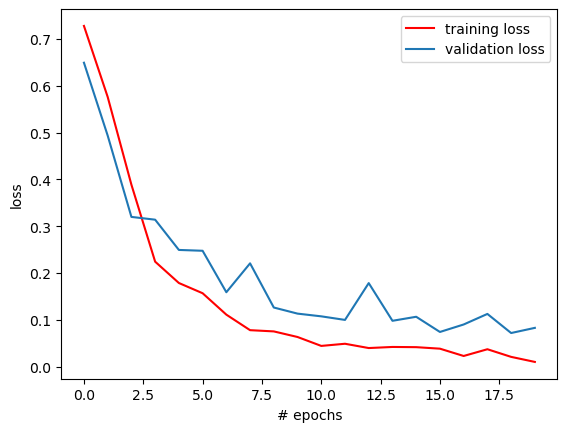

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

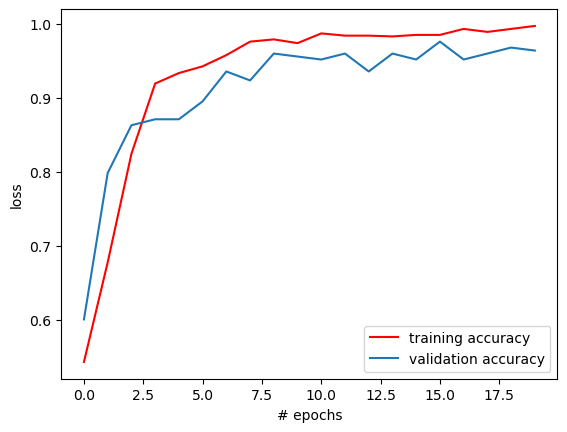

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 150ms/step - loss: 0.0612 - accuracy: 0.9783
[0.06116003915667534, 0.97826087474823]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model("C:/Users/shrey/Desktop/model-017.model")

face_clsfr=cv2.CascadeClassifier("C:/Users/shrey/Desktop/haarcascade_frontalface_default.xml")

source=cv2.VideoCapture(1)
if not source.isOpened():
    source=cv2.VideoCapture(0)
if not source.isOpened():
    raise IOError("Cannot Open Webcam")

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()